Data Loading and Cleaning

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

file_path = 'Global_Superstore2.csv'

try:
    df = pd.read_csv(file_path)
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='cp1252')
        
df.columns = df.columns.str.replace(' ', '_')

df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y', errors='coerce')

df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

df.dropna(subset=['Order_Date', 'Sales', 'Profit', 'Category'], inplace=True)

df['Month'] = df['Order_Date'].dt.to_period('M').dt.to_timestamp()

category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
total_sales = category_sales.sum()
total_profit = df['Profit'].sum()

monthly_profit = df.groupby('Month')['Profit'].sum().sort_index()

metrics = {
    'Total Sales (Overall)': f"${total_sales:,.2f}",
    'Total Profit (Overall)': f"${total_profit:,.2f}",
    'Overall Profit Margin': f"{(total_profit / total_sales * 100):.2f}%",
    'Best Selling Category': f"{category_sales.index[0]} (${category_sales.values[0]:,.2f})",
    'Highest Profit Month': f"{monthly_profit.idxmax().strftime('%b %Y')} (${monthly_profit.max():,.2f})",
}

print("--- Key Performance Indicators (KPIs) ---")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

--- Key Performance Indicators (KPIs) ---
Total Sales (Overall): $12,642,501.91
Total Profit (Overall): $1,467,457.29
Overall Profit Margin: 11.61%
Best Selling Category: Technology ($4,744,557.50)
Highest Profit Month: Sep 2014 ($67,979.45)


Bar Chart

<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
C:\Users\adity\AppData\Local\Temp\ipykernel_22988\3109425627.py:10: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel('Total Sales (\$)', fontsize=12)


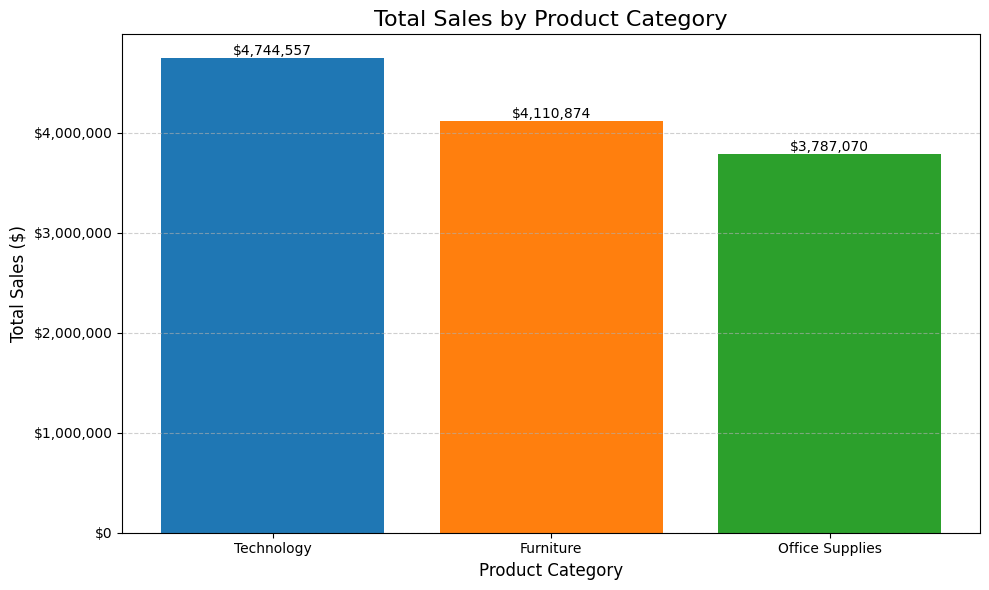

In [21]:
plt.figure(figsize=(10, 6))
bars = plt.bar(category_sales.index, category_sales.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'${yval:,.0f}', ha='center', va='bottom')

plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales (\$)', fontsize=12)
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Line Chart

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\adity\AppData\Local\Temp\ipykernel_22988\3498073875.py:6: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel('Total Monthly Profit (\$)', fontsize=12)


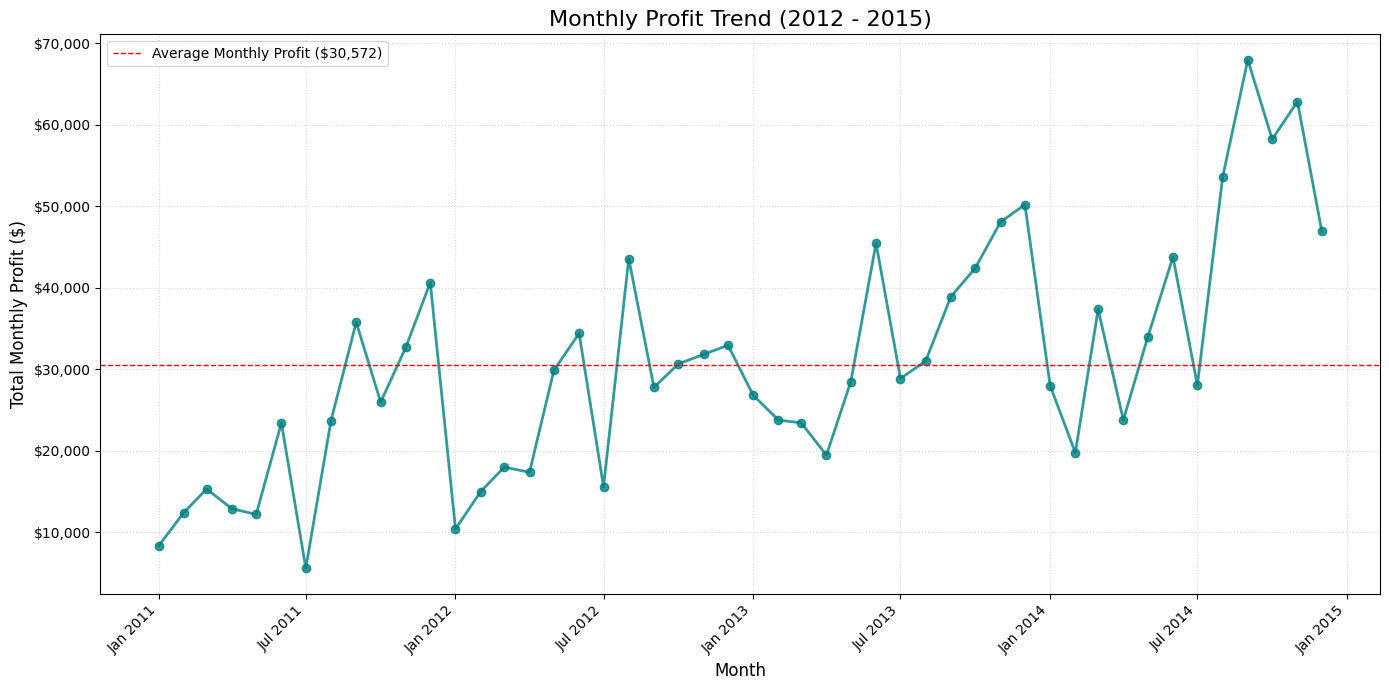

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_profit.index, monthly_profit.values, marker='o', linestyle='-', color='teal', alpha=0.8, linewidth=2)

plt.title('Monthly Profit Trend (2012 - 2015)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Monthly Profit (\$)', fontsize=12)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

avg_profit = monthly_profit.mean()
plt.axhline(avg_profit, color='red', linestyle='--', linewidth=1, label=f'Average Monthly Profit (${avg_profit:,.0f})')
plt.legend()
plt.grid(axis='both', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show() 